# Classification

## Classification using Linear Regression


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [2]:
x1 = np.random.normal(5,1,10)
x1 = np.append(np.random.normal(5, 1, 9), 20) #
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

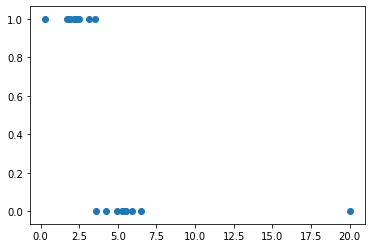

In [3]:
plt.scatter(x,labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.,0.],name="parameter",dtype=tf.float32)

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

y_pred = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_pred,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    #print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:labels}))
    #print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:labels}))
    #print(sess.run(tf.greater(y_pred,0.5),feed_dict={X:x,Y:labels}))
    sess.close()
        

0   9.202574
100   3.5357254
200   3.3711028
300   3.3662035
400   3.3660579
500   3.3660536
600   3.3660536
700   3.3660533
800   3.3660533
900   3.3660533
Learned parameter :  [ 0.8208438  -0.07242282]


In [6]:
y_model=w_val[0]+w_val[1]*x

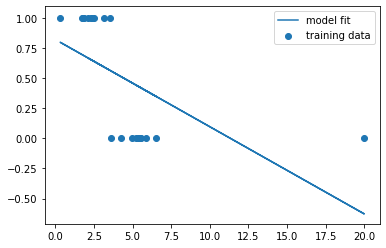

In [7]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## What if there are outliers?

In [8]:
x1 = np.append(np.random.normal(5, 1, 9), 20) #outlier added
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    sess.close()

0   9.278437
100   3.4980261
200   3.3750827
300   3.37243
400   3.3723726
500   3.3723717
600   3.3723717
700   3.3723717
800   3.3723717
900   3.3723717
Learned parameter :  [ 0.7955587  -0.07051746]


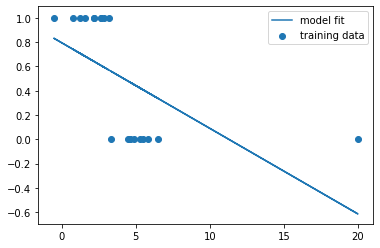

In [9]:
y_model=w_val[0]+w_val[1]*x
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## Logistic Regression (Classification :P)

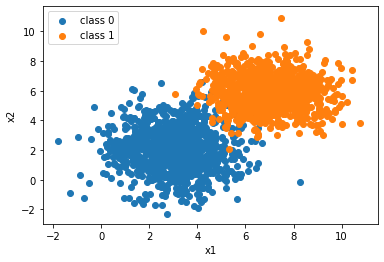

In [10]:
# Gernerate fake 2D data 
x1_l1=np.random.normal(3,1.3,[1000,1])
x1_l2=np.random.normal(7,1.2,[1000,1])
x2_l1=np.random.normal(2,1.5,[1000,1])
x2_l2=np.random.normal(6,1.1,[1000,1])
x1=np.append(x1_l1,x1_l2,axis=0)
x2=np.append(x2_l1,x2_l2,axis=0)
x=np.append(x1,x2,axis=1)
y=np.array([[0.]*len(x1_l1)+[1.]*len(x2_l2)]).T

plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [11]:
learning_rate = 0.0001
training_epochs = 3000

def sigmoid(x):
    return 1/(1+np.exp(-x))

(m,n) = x.shape

In [12]:
# define placeholders and variables
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32,[None,1])
b = tf.Variable(0.0, name='bias', dtype=tf.float32,trainable=True)
w = tf.Variable(np.zeros([n,1]), name='weights', dtype=tf.float32, trainable=True)

In [13]:
# model
y_model = tf.sigmoid(tf.matmul(X,w)+b)
#y_model = tf.sigmoid(X@w+b)
#y_model = tf.sigmoid(X[:,0]*w[0,0]+X[:,1]*w[1,0]+b)

In [14]:
# cost
cost = -tf.reduce_sum(Y*tf.log(y_model)+(1-Y)*tf.log(1-y_model))

In [15]:
# trainer
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_model,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_cost = 0
    for epoch in range(training_epochs):
        curr_cost,_ = sess.run([cost,trainer], feed_dict={X:x,Y:y})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
        if abs(prev_cost-curr_cost)<0.001:
            break
        prev_cost = curr_cost
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('Learned weights : ', w_val)
    print('Learned bias : ', b_val)
    print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:y}))
    print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:y}))
    print(sess.run(tf.greater(y_model,0.5),feed_dict={X:x,Y:y}))
    sess.close()

0   1386.2919
100   584.5429
200   405.4539
300   322.78763
400   274.95776
500   243.5356
600   221.1695
700   204.35104
800   191.19032
900   180.5762
1000   171.81134
1100   164.43494
1200   158.12952
1300   152.66907
1400   147.88808
1500   143.66222
1600   139.89627
1700   136.51634
1800   133.46313
1900   130.68979
2000   128.15799
2100   125.83619
2200   123.69823
2300   121.722275
2400   119.88984
2500   118.185196
2600   116.5949
2700   115.10741
2800   113.712585
2900   112.40178
Learned weights :  [[1.2656755]
 [1.156573 ]]
Learned bias :  -10.995727
Correct predictions :  [[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
Accuracy : 0.984
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


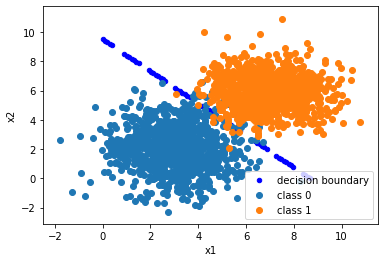

In [17]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[1] - x1_test*w_val[0] - b_val)
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20, label = 'decision boundary')
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Multiclass classification

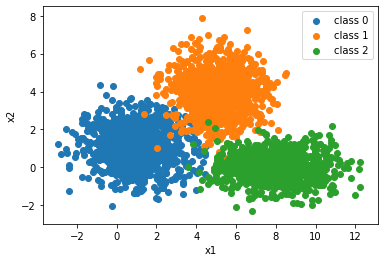

In [18]:
# Gernerate fake 2D data 
# (1,1) (5,4) (8,0)
x1_l1=np.random.normal(1,1.3,[1000,1])
x1_l2=np.random.normal(5,1.2,[1000,1])
x1_l3=np.random.normal(8,1.5,[1000,1])
x2_l1=np.random.normal(1,1.0,[1000,1])
x2_l2=np.random.normal(4,1.1,[1000,1])
x2_l3=np.random.normal(0,0.7,[1000,1])

x1=np.concatenate((x1_l1,x1_l2,x1_l3),axis=0)
x2=np.concatenate((x2_l1,x2_l2,x2_l3),axis=0)
x=np.concatenate((x1,x2),axis=1)
y=np.matrix([[1,0.,0.]]*len(x1_l1)+[[0.,1.,0.]]*len(x2_l2)+[[0.,0.,1.]]*len(x2_l3))

# preview data
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [19]:
# divide to training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7)
(train_size,n_features)=x_train.shape

In [20]:
# hyperparameters
learning_rate = 0.001
training_epochs = 500
num_classes = 3
batch_size = 100

# define placeholders, variables
X = tf.placeholder(tf.float32, [None,n_features])
Y = tf.placeholder(tf.float32, [None,num_classes])
w = tf.Variable(tf.zeros([n_features,num_classes]),dtype=tf.float32, name='weights')
b = tf.Variable(tf.zeros([1,num_classes]),dtype=tf.float32, name='bias')

# softmax model
y_model = tf.nn.softmax(X@w + b)

# cost and train op
cost = tf.reduce_sum(-Y*tf.log(y_model))
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# performance params
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs * train_size // batch_size ):
        datum = (epoch*batch_size) % train_size
        x_batch = x_train[datum: datum+batch_size,:]
        y_batch = y_train[datum: datum+batch_size,:]
        curr_cost, _ = sess.run([cost, trainer], feed_dict={X:x_batch, Y:y_batch})
        if epoch % 100 == 0:
            print(epoch, ": ", curr_cost)
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))
    w_val = sess.run(w)
    b_val = sess.run(b)

0 :  109.8612
100 :  25.580025
200 :  17.686733
300 :  15.644783
400 :  12.824154
500 :  12.357355
600 :  14.853486
700 :  8.553354
800 :  14.562145
900 :  8.565334
1000 :  10.760592
1100 :  6.759293
1200 :  7.2994003
1300 :  8.101313
1400 :  10.4142
1500 :  8.110849
1600 :  5.0148926
1700 :  9.519991
1800 :  10.541179
1900 :  6.1748676
2000 :  7.1077642
2100 :  4.409631
2200 :  4.6684546
2300 :  5.3763123
2400 :  6.3535085
2500 :  7.367055
2600 :  7.4315615
2700 :  8.882256
2800 :  4.5319633
2900 :  11.830828
3000 :  5.456152
3100 :  8.152401
3200 :  4.556823
3300 :  5.5764446
3400 :  6.7810407
3500 :  6.795725
3600 :  6.2981577
3700 :  3.593008
3800 :  7.907577
3900 :  9.035961
4000 :  4.796723
4100 :  5.9530163
4200 :  2.9997792
4300 :  3.9210875
4400 :  4.2538896
4500 :  5.273163
4600 :  6.6999273
4700 :  6.974884
4800 :  7.886572
4900 :  3.6829875
5000 :  11.541975
5100 :  4.7596807
5200 :  7.4730225
5300 :  3.9062037
5400 :  5.185848
5500 :  6.636596
5600 :  5.4849677
5700 :  5.7

[[5.96795681e-05 7.79310021e-17 2.94018570e-13]
 [5.50088917e-05 7.91968824e-17 3.13884501e-13]
 [5.07037544e-05 8.04833251e-17 3.35092712e-13]
 ...
 [1.41727518e-18 9.62662465e-04 1.00244089e-12]
 [1.30635558e-18 9.78299573e-04 1.07017274e-12]
 [1.20411684e-18 9.94190683e-04 1.14248103e-12]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


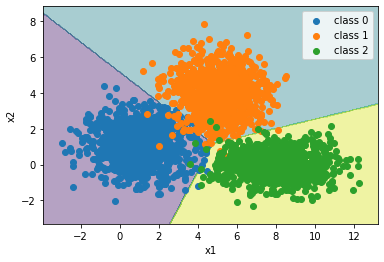

In [22]:
# obtain decision boundary
resolution = 0.05
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
yy = softmax(xx@w_val+b_val)
print(yy)
yy = np.argmax(yy,axis=1).reshape(xx1.shape)
print(yy)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()